<div class="alert alert-block alert-info">
<h2> Comments </h2>
</div>

Hi Yesika,

I have checked you work and left comments in such cells. Cells are of two types:

<div class="alert alert-block alert-danger">
<p> <strong> A red colored cell </strong> indicates that you need to improve or adjust part of the project above. </p>
</div>
<div class="alert alert-block alert-info">
<p> <strong> A blue colored cell </strong> indicates that no improvements are needed in the cells above. May include some suggestions and recommendations.</p>
</div>

Hope it all will be clear to you :)

You did a great job 😀. You understand what you are doing and why, also can make right conclusions - which is great 👍.

Thank you for keeping your notebook clean and structured, with clear explanations :)

Project is accepted :)

*Good luck!*

------------

## Analyzing borrowers’ risk of defaulting

Your project is to prepare a report for a bank’s loan division. You’ll need to find out if a customer’s marital status and number of children has an impact on whether they will default on a loan. The bank already has some data on customers’ credit worthiness.

Your report will be considered when building a **credit scoring** of a potential customer. A ** credit scoring ** is used to evaluate the ability of a potential borrower to repay their loan.

The data may contain artifacts, or values that don't correspond to reality—for instance, a negative number of days employed. You need to describe the possible reasons such data may have turned up and process it. Data analysis is about more than just running calculations e.g. there’s also looking for outliers, artifacts, and errors in the data too.

### Data dictionary
- children : the number of children in the family
- days_employed: how long the customer has worked
- dob_years: the customer’s age
- education: the customer’s education level
- education_id: identifier for the customer’s education
- family_status: the customer’s marital status
- family_status_id: identifier for the customer’s marital status
- gender: the customer’s gender
- income_type: the customer’s income type
- debt: whether the client has ever defaulted on a loan
- total_income: annual income
- purpose: reason for taking out a loan

In [1]:
import pandas as pd  # process dataframes
import numpy as np # process arrays
import matplotlib.pyplot as plt #plotting
import seaborn as sns # plotting
plt.style.use('ggplot')

from nltk.stem import SnowballStemmer # Natural Language Processing

### Step 1. Open the data file and have a look at the general information. 

In [2]:
## Reading dataset
df = pd.read_csv('/datasets/credit_scoring_eng.csv')

# General information including the numbers of objects within each column
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB
None


In [3]:
## update features names
#[col for col in df.columns]
#[col.lower().replace(' ','_') for col in df.columns]

In [4]:
# Displaying first two rows
display(df.head(2))

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase


In [5]:
# Summarizing only numerical columns
display(df.describe(include = [np.number]))

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,19351.000000
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,26787.568355
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,16475.450632
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,3306.762000
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,16488.504500
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,23202.870000
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,32549.611000
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,362496.645000


In [6]:
# Summarizing only categorical columns
display(df.describe(include = ['O']))

,education,family_status,gender,income_type,purpose
count,21525,21525,21525,21525,21525
unique,15,5,3,8,38
top,secondary education,married,F,employee,wedding ceremony
freq,13750,12380,14236,11119,797


In [7]:
## calculating the probability of default (debt =1)
df['debt'].mean()

0.08088269454123112

**We have 8% default rate**

In [8]:
## calculating the probability of default (debt =1)
df.pivot_table(index = 'gender',values = ['debt'], aggfunc = ['count','sum','mean'])
# using group by
df.groupby(['gender'])['debt'].agg(['count','sum','mean'])

,count,sum,mean
gender,,,
F,14236,994,0.069823
M,7288,747,0.102497
XNA,1,0,0.000000


In [9]:
df.groupby(['gender','debt'])['debt'].agg(['count'])

count
gender debt       
F      0     13242
       1       994
M      0      6541
       1       747
XNA    0         1

In [10]:
## highlight if probability of default greater than the general value (8%)

(df.groupby(['gender'])['debt']
.agg(['count', 'mean'])
.sort_values('count',ascending=False)
.style
.format({
    'mean': '{:,.1%}'.format,
})
.applymap(
     lambda x: 'background-color : limegreen' if x>0.08 else '', 
     subset=['mean']))

,count,mean
gender,,
F,14236,7.0%
M,7288,10.2%
XNA,1,0.0%


### Conclusion

At a first glance we can observe that:
- There are 21525 observations and 12 features in the credit scoring dataset.
- There are 4 categorial features, and 8 numeric features (type int and float).
- The following features have missing values: days_employed, and total_income.

Some data will require preprocessing, for instance:
- Some features might present collinearity. For example, education and education_id.
- Some data types might need to be replace it. For example, days_employed, as it should be an integer number.
- Al least 25% of values in days_employed have negative values. It means nothing. Just rubbish.
- The minimum value for children is -1, which could be a dead member, but we are going to assume that this data has errors - human factor.
- The maximum value for children is 20, which it is also incorrect.

<div class="alert alert-block alert-info">
<h2> Comments </h2>
</div>

Great :)

I won't agree with you on these points for now:

<blockquote>
    <ul>
        <li>Al least 25% of values in days_employed have negative values. It means nothing. Just rubbish.</li>
        <li>The maximum value for children is 20, which it is also incorrect.</li>
    </ul>
</blockquote>

We'll see what you will decide further :)

**UPD**. It is all well explained and processed by you further on step 2 👍

------------

### Step 2. Data preprocessing

- Identify and fill in missing values.
- Replace the real number data type with the integer type.
- Delete duplicate data.
- Categorize the data.

### Processing missing values

The Problem with leaving nulls in the dataset or redefining them as 'NA' is that it does not solve the problem and we cannot use them in our analysis. Each time when we need to use features with null values if we just discard those null observations and thus reduce size of the sample as well as dataset in general. By doing so we include bias in the reduced dataset, make it different from the original one. Thus we cannot combine conclusions derived from the reduced dataset with those that were obtained from the dataset with null observations, as these conclusions are based on different data.

I believe to replace NaNs with special value/symbol and keep it in mind during analysis is a good approach. Under “keep it in mind” I mean, that you don’t evaluate mean/median through such values, just skipping them. It introduce less bias, than filling such values with mean/median inside corresponding group. Also if such NaNs is completely random, there won’t be any bias in data. So I consider this approach is the best for your goals.

In [11]:
# First, we are going to identify null values using the isnull() method, which checks for missing values in a column. 
print(df.isnull().sum())

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64


In [12]:
## We are going to start imputating values for the features: days_employed, and total_income. 
#Let’s take a look at the rows that contain NaN.
display(df[df['total_income'].isnull()].head())

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,secondary education,1,civil partnership,1,M,retiree,0,NaN,to have a wedding
26,0,NaN,41,secondary education,1,married,0,M,civil servant,0,NaN,education
29,0,NaN,63,secondary education,1,unmarried,4,F,retiree,0,NaN,building a real estate
41,0,NaN,50,secondary education,1,married,0,F,civil servant,0,NaN,second-hand car purchase
55,0,NaN,54,secondary education,1,civil partnership,1,F,retiree,1,NaN,to have a wedding


-  It seems that the rows with missing values for days_employed, also have missing values for total_income. We are going to assume that these NaNs occurred when a customer did not have a job. Therefore, we will fill NaNs with the number 0 for these two numeric features.
- Also, as the instructor suggested, zero is a better option, because it’s very important column for banks and it’s extreme unlikely that banks leave this column empty for another reason.

In [13]:
# Replacing NaNs values
df['total_income'] = df['total_income'].fillna(0)
df['days_employed'] = df['days_employed'].fillna(0)

# Verifying imputation
print(df.isnull().count())

children            21525
days_employed       21525
dob_years           21525
education           21525
education_id        21525
family_status       21525
family_status_id    21525
gender              21525
income_type         21525
debt                21525
total_income        21525
purpose             21525
dtype: int64


<div class="alert alert-block alert-info">
<h2> Comments </h2>
</div>

Good :)

------------

In [14]:
## Identifying  missing values for categorical values
print(df['gender'].value_counts())

F      14236
M       7288
XNA        1
Name: gender, dtype: int64


In [15]:
## There is one observation with a missing value, having a level of "XNA".
# Let's observe this row 
display(df [ df['gender']== 'XNA'])

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
10701,0,-2358.600502,24,some college,2,civil partnership,1,XNA,business,0,32624.825,buy real estate


- As there is only one observation as missing value for the gender feature, which represent less than the 1% of the data. We will drop this value.

In [16]:
length_before = len(df)
df = df.drop([10701],axis=0) # dropping index 10701
length_after = len(df)

print('length before: {} and after dropping a row: {}'.format(length_before,length_after))

length before: 21525 and after dropping a row: 21524


### Conclusion

- Missing values for the numeric features: **days_employed, and total_income** were identified using the using the isnull() method, which checks for missing values in a column. 

A possible reason for these missing values was that these missing values occurred when a customer did not have a job, as the rows with missing values for days_employed, also have missing values for total_income. 

In order to avoid losing rows with important data, we replaced the NaN value in the columns with zeros, using the fillna() method (filling with N/A), where the argument is a substitute for the missing values. 

- Missing values for the categorical feature: **gender** was identified using the value_counts() method which count the unique values whithin the feature. 

As there is only one observation as missing value for the gender feature, the possible reason for this behavior was a data entry error. 

This missing value represents less than the 1% of the data. Threfore, we dropped this value from the dataset using the drop() method.

<div class="alert alert-block alert-info">
<h2> Comments </h2>
</div>

Great :)

------------

### Data type replacement

**Note from instructor**: Real number is float data type. If you feature has integer nature, it’s better to store it as int. For instance, if your feature is the number of floor, it’s strange to store it as a float, because you expect it to be integer. Also float numbers take more memory than int.

There are two variables with float type, when we obbserve the info table:
    - days_employed
    - income
And only days_employed makes sense to be changed to integer type. As income, in financial terms, will be a float number.

In [17]:
# Repalcing data type
df['days_employed'] =df['days_employed'].astype('int')

# Verifying data type
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21524 entries, 0 to 21524
Data columns (total 12 columns):
children            21524 non-null int64
days_employed       21524 non-null int64
dob_years           21524 non-null int64
education           21524 non-null object
education_id        21524 non-null int64
family_status       21524 non-null object
family_status_id    21524 non-null int64
gender              21524 non-null object
income_type         21524 non-null object
debt                21524 non-null int64
total_income        21524 non-null float64
purpose             21524 non-null object
dtypes: float64(1), int64(6), object(5)
memory usage: 2.1+ MB
None


### Conclusion

Replace the real number data type with the integer type.
—which method you used to change the data type and why;
—which dictionaries you've selected for this data set and why.


There are two variables with float type, when we obbserve the info table:
    - days_employed
    - income
And only days_employed makes sense to be changed to the integer type. As income, in financial terms, will be a float number.

The data type of days_employed was transformed using the .astype('int') method.


<div class="alert alert-block alert-info">
<h2> Comments </h2>
</div>

Great :)

Also, `debt` datatype should be changed to boolean, as it is not a quantitative feature.

------------

### Processing duplicates
- Each row corresponds to a customer.

In [18]:
## first lets put the content of the education feature as lowercase:
# if we don't clean the data in this column, the .duplicated() method won't consider "GRADUATE DEGREE" and "graduate degree"
print('Before:')
print(df['education'].value_counts())
print('------')
df['education'] = df['education'].str.lower()
print('After:')
print(df['education'].value_counts())

Before:
secondary education    13750
bachelor's degree       4718
SECONDARY EDUCATION      772
Secondary Education      711
some college             667
BACHELOR'S DEGREE        274
Bachelor's Degree        268
primary education        250
Some College              47
SOME COLLEGE              29
PRIMARY EDUCATION         17
Primary Education         15
graduate degree            4
GRADUATE DEGREE            1
Graduate Degree            1
Name: education, dtype: int64
------
After:
secondary education    15233
bachelor's degree       5260
some college             743
primary education        282
graduate degree            6
Name: education, dtype: int64


In [19]:
# Searching for duplicate data
print('Duplicated rows:',df.duplicated().sum())
#print(df[‘col’].duplicated().sum())

# Reviewing some duplicates:
print('Reviewing some duplicates:')
display(df[df.duplicated()].head(10))

# Deleting duplicates
df.drop_duplicates(inplace=True)

# verifying duplicated rows
print('Veryfing duplicated rows:',df.duplicated().sum())

# Reseting the index number
df = df.dropna().reset_index(drop=True)

Duplicated rows: 71
Reviewing some duplicates:


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
2849,0,0,41,secondary education,1,married,0,F,employee,0,0.0,purchase of the house for my family
3290,0,0,58,secondary education,1,civil partnership,1,F,retiree,0,0.0,to have a wedding
4182,1,0,34,bachelor's degree,0,civil partnership,1,F,employee,0,0.0,wedding ceremony
4851,0,0,60,secondary education,1,civil partnership,1,F,retiree,0,0.0,wedding ceremony
5557,0,0,58,secondary education,1,civil partnership,1,F,retiree,0,0.0,to have a wedding
6312,0,0,30,secondary education,1,married,0,M,employee,0,0.0,building a real estate
7808,0,0,57,secondary education,1,civil partnership,1,F,retiree,0,0.0,having a wedding
7921,0,0,64,bachelor's degree,0,civil partnership,1,F,retiree,0,0.0,having a wedding
7938,0,0,71,secondary education,1,civil partnership,1,F,retiree,0,0.0,having a wedding
8583,0,0,58,bachelor's degree,0,unmarried,4,F,retiree,0,0.0,supplementary education


Veryfing duplicated rows: 0


### Conclusion

54 duplicated rows were identified using the df.duplicated() and sum() method. Where the duplicated() method returns Series with the value True if there are duplicates, False if there aren’t. When we partner it up it with sum(), it returns the number of duplicates.

After identified the duplicates, I reviewed the top 10 rows and no pattern was identified. Therefore, we attribute the dupplicate to entry data repetitions, human factor.

Finally, the duplicates were removed from the dataset using the drop_duplicates() method. And we reseted the index with the dropna().reset_index(drop=True) method. Because when we call the drop_duplicates() method, the rows containing repetitions are deleted including their indices.

Further analysis of the feature content will be done in the Categorizing Data step.

<div class="alert alert-block alert-info">
<h2> Comments </h2>
</div>

Great :)

------------

### Categorizing Data

**Notes from instructor**: The data may contain artifacts, or values that don't correspond to reality—for instance, a negative number of days employed. This kind of thing happens when you're working with real data. You need to describe the possible reasons such data may have turned up and process it.

- For instance, for **days_employed**:
If you’ll plot histogram of such data and see that distribution of negative values is different out of positive values, you can assume, that something is wrong with them. If you want to check the problem is only with a sign, you can take absolute value and plot the same histogram again. If now negative values look like fine, their distribution is coincided with distribution of positive values, you can suggest that the problem really was only with sign.
As you can see I nowhere mentioned type of distribution, thus it’s not necessary to be normal.
About days_employed - yes, you can leave it as it is, because you don’t need it in your final analysis.

- Now, for the **children** feature:
You can’t say for 100% that 20 children is a outliers. Also it doesn’t matter. You will analyze categorized children feature. So rows with children is equal to 20 will be putted to the category, for instance, “more than 5 children”.
How do we interpret the -1 value? How much rows this -1 children? If just several, you can drop them. If a lot, just make special category for that. For instance, “unknown”. If you don’t have a description about ‘-1’ values, it’s better to think that it’s a bug in data. Using “unk” values for it is a good choice.


- for the variable **purpose**:
Let’s go step by step:
If you use only pos=“n” in method lemmatize, then only noun words will be lemmatized. In the exerciser there was a task how to deal with it. You should check the type of each word and use it in the argument pos.
Firstly, you should to lemmatize each purpose and store it in a new column
Secondly, you should write a function which you will use next in the .apply method.
You need to apply your function from step 3 to the result of step 2 and get new categorized column.
About this magic function. You dealt with very similar function in the exerciser, when you categorized age of people. This function should get row and return the category. It’s very similar to your loop, but the function should return category.

- Just print variable pos_tag and you will understand why this happend.
tag_dict = {"J": wordnet.ADJ,
            "N": wordnet.NOUN,
            "V": wordnet.VERB,
            "R": wordnet.ADV}
 
tag = nltk.pos_tag([word])[0][1][0].upper()
 
new_word = lemmatizer.lemmatize(word, tag_dict.get(tag, wordnet.NOUN))

Text(0.5, 0, 'Days employed')

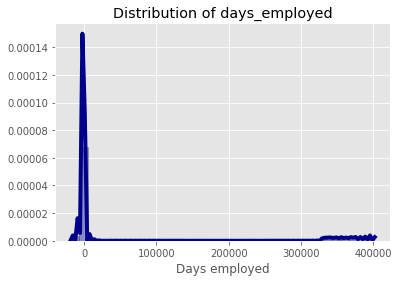

In [20]:
## Starting with the days_employed feature
# Density Plot and Histogram of days_employed

sns.distplot(df['days_employed'], hist=True, kde=True,
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
# Add labels
plt.title('Distribution of days_employed')
plt.xlabel('Days employed')


Text(0.5, 0, 'bsolute value of Days employed')

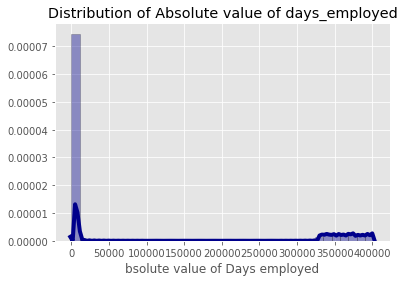

In [21]:
# As we can see the from the plot histogram that the distribution of negative values 
# is different out of positive values, we can assume, that something is wrong with these values.

# Let's check if the problem is only with a sign.

# Density Plot and Histogram of the absolute value of days_employed

sns.distplot(abs(df['days_employed']), hist=True, kde=True,
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
# Add labels
plt.title('Distribution of Absolute value of days_employed')
plt.xlabel('bsolute value of Days employed')

# After taking the absolute value and plot the same histogram again. 
# We cannot conclude that the problem really is only with the sign,
# as their distribution is skwew and it is hard to assume that coincided with distribution of positive values.
# Since this variable will be not used for further analysis in the following steps. We will not procede to do a further analysis.


<div class="alert alert-block alert-info">
<h2> Comments </h2>
</div>

In `days_employed` extremely large values (about 1000 years) belong to observetions that are either `unemployed` or `retiree` (`income_type` categories). So, there seems to be a pattern :)

------------

Text(0.5, 0, 'Number of children')

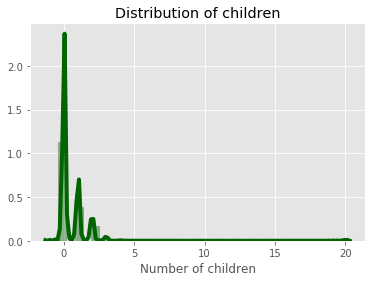

In [22]:
## Analyzing the variable children

# Density Plot and Histogram of children
import seaborn as sns
sns.distplot(df['children'], hist=True, kde=True,
             bins=int(180/5), color = 'darkgreen', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

# Add labels
plt.title('Distribution of children')
plt.xlabel('Number of children')

In [23]:
# for the variable children most of the values are less than 5.

# Let's find out how many observations where captured as -1
print("There are: {} cases with value -1 for the feature children".format(
    len(df[df['children'] == -1])))

There are: 47 cases with value -1 for the feature children


In [24]:
## categorizing the variable children 

def children_group(children): 
    """ The function returns the children group according to children quantity, 
        by using the following rules: 
        - 'children', with value <= -1  :'unknown', 
        - children', with value = 0  :'without children', 
        - 'children', with value over  5  and up to 64 : 'more than 5 children' 
        - for all other cases : '1 to 4 children'
    """ 
    try:
        if children <= -1: return 'unknown' 
        elif children == 0:  return 'without children' 
        elif children >= 5:  return 'more than 5 children' 
        else: return '1 to 4 children'
    except:
        print('Check that the values are numeric') 
#print(children_group(-1)) # unknown


# Creating a separate column for children categories
df['children_group'] = df['children'].apply(children_group) 
display(df.head(3))

#Now let's get data on children groups with the value_counts() method:
display(df['children_group'].value_counts())

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,children_group
0,1,-8437,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,1 to 4 children
1,1,-4024,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,1 to 4 children
2,0,-5623,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,without children


without children        14090
1 to 4 children          7231
more than 5 children       85
unknown                    47
Name: children_group, dtype: int64

In [25]:
## Identifying categorical values for the variable purpose

print(df['purpose'].nunique())
print('------')
print(df['purpose'].value_counts())

38
------
wedding ceremony                            791
having a wedding                            768
to have a wedding                           765
real estate transactions                    675
buy commercial real estate                  661
housing transactions                        652
buying property for renting out             651
transactions with commercial real estate    650
purchase of the house                       646
housing                                     646
purchase of the house for my family         638
construction of own property                635
property                                    633
transactions with my real estate            627
building a real estate                      624
purchase of my own house                    620
buy real estate                             620
building a property                         619
housing renovation                          607
buy residential real estate                 606
buying my own car             

In [26]:
# As we can see, there are multiple categories that can be rearranged. For instance the purpuses: 
# wedding ceremony, having a wedding, and to have a wedding can be group together as 'wedding expenses'

# We are going to use NLTK package for this purpose.
eng_stemmer = SnowballStemmer('english')

# first, we identify the common keywords and their stems to identify duplicated values later.
words = ['wedding', 'estate', 'housing', 'property', 'house', 'car', 'education', 'educated', 'university']
stem_dict = {}
for word in words:
    print('Word: {}, Stem: {}'.format(word, eng_stemmer.stem(word)))
    stem_dict[eng_stemmer.stem(word)] = word
print('-------')
print ('initial dictionary:',stem_dict)

# adjusting the dictionary to the new levels for the variable purpose
stem_dict['estat'] = 'commercial housing'
stem_dict['hous'] = 'private housing'
stem_dict['properti'] = 'private housing'
stem_dict['educ'] = 'education'
stem_dict['univers'] = 'education'
print('-------')
print ('final dictionary:', stem_dict)

Word: wedding, Stem: wed
Word: estate, Stem: estat
Word: housing, Stem: hous
Word: property, Stem: properti
Word: house, Stem: hous
Word: car, Stem: car
Word: education, Stem: educ
Word: educated, Stem: educ
Word: university, Stem: univers
-------
initial dictionary: {'wed': 'wedding', 'estat': 'estate', 'hous': 'house', 'properti': 'property', 'car': 'car', 'educ': 'educated', 'univers': 'university'}
-------
final dictionary: {'wed': 'wedding', 'estat': 'commercial housing', 'hous': 'private housing', 'properti': 'private housing', 'car': 'car', 'educ': 'education', 'univers': 'education'}


In [27]:
# Second, we define a function to match the stem_dict with every value in the column purpose
def purpose_stem(row, stemmed_dict):
    ''' 
    This function identify the stem of a word given a string (sentence).
    '''
    # first lets find the stem splitting the string by space
    try: 
        stemmed = [eng_stemmer.stem(word) for word in row.split(' ')]
        # print(stemmed)

        # let's evaluate the list of stemmed found previously
        # if 'wed' in stemmed: return 'wedding'
        for key,value in stemmed_dict.items():
            if key in stemmed: 
                return value
    except:
        print('Check that the values are strings')
        
#purpose_stem(df['purpose'][0])
#df['purpose'].apply(purpose_stem) 

purpose_stem(df['purpose'][0], stem_dict)
df['purpose_category'] = df['purpose'].apply(purpose_stem, stemmed_dict =stem_dict)

#checking the output
print("Checking if the categorization works:")
display(df[['purpose','purpose_category']].head(10))

## Checking the frequency
print("frequency of new levels: \n", df['purpose_category'].value_counts())

Checking if the categorization works:


,purpose,purpose_category
0,purchase of the house,private housing
1,car purchase,car
2,purchase of the house,private housing
3,supplementary education,education
4,to have a wedding,wedding
5,purchase of the house,private housing
6,housing transactions,private housing
7,education,education
8,having a wedding,wedding
9,purchase of the house for my family,private housing


frequency of new levels: 
 private housing       6347
commercial housing    4463
car                   4306
education             4013
wedding               2324
Name: purpose_category, dtype: int64


### Conclusion

Some features were categorized to facilitate the analysis. For isntance, the data that might contain artifacts, or values that do not correspond to reality and features with multiple levels.

- Starting with the days employed varible, this variable had multiple negative values. After analyzing the distribution of negative values before and after calculating the absolute value, we cannot conclude that the problem depends only with the sign of the value. Moreover, this variable will be not used for further analysis in the following steps. We will not procede to do a further preprocessing.

- For the children feature, after analyzing its distribution and noticing that most of the values are less than 5, I procedeed to categorize the children, given this number and also to reagroup the values with -1 as unknown, as we do not want to drop this observations (47 rows). For this a function was defined to classify the 3 new categories, and then applied to the series using the apply function.

- Finally, for the purpose feature, initially we had 38 different responses that were reagroup into 5 new levels using the stem of the words. For this purpose, we starting identifying the key words and saving the stem as a dictionary. Then, some of the stems were reagrouped in order to create more concise levels for this feature. After that a function that identify the stem of a word given a string (sentence) was created  and finally applied to the dataframe using the apply function.


<div class="alert alert-block alert-info">
<h2> Comments </h2>
</div>

Excellent :)

'private housing' and 'commercial housing' categories can be grouped into one category 'real_estate' in this project :)

You have studied almost all the columns in the dataset and indetified almost all the problems. The only thing that you've missed is 0-year old clients 🤓

------------

### Step 3. Answer these questions

**- Is there a relation between having kids and repaying a loan on time?**

if debt = 0, it can be considered as “on-time repayment of loans”, if debt = 1, then it means they have defaulted before.

In [28]:
display(df['children_group'].value_counts())

without children        14090
1 to 4 children          7231
more than 5 children       85
unknown                    47
Name: children_group, dtype: int64

In [29]:
display(df['debt'].value_counts())

0    19712
1     1741
Name: debt, dtype: int64

In [30]:
## Total observations among groups
print(df.groupby(['children_group','debt'])['debt'].count())

children_group        debt
1 to 4 children       0        6562
                      1         669
more than 5 children  0          77
                      1           8
unknown               0          46
                      1           1
without children      0       13027
                      1        1063
Name: debt, dtype: int64


In [31]:
# Percentage of obervations among groups 
round(df.groupby(['children_group','debt'])['debt'].count()/df.groupby(['debt' ])['children_group'].count(),3)

children_group        debt
1 to 4 children       0       0.333
                      1       0.384
more than 5 children  0       0.004
                      1       0.005
unknown               0       0.002
                      1       0.001
without children      0       0.661
                      1       0.611
dtype: float64

In [32]:
# percentage of debt per category (where every category is 100%)
round(df.groupby(['children_group','debt'])['debt'].count()/df.groupby(['children_group'])['debt'].count(),2)

children_group        debt
1 to 4 children       0       0.91
                      1       0.09
more than 5 children  0       0.91
                      1       0.09
unknown               0       0.98
                      1       0.02
without children      0       0.92
                      1       0.08
Name: debt, dtype: float64

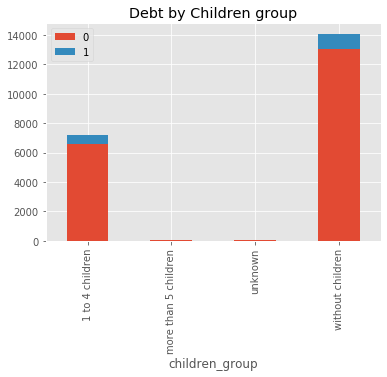

In [33]:
df.groupby(['children_group','debt']).size().unstack().plot(kind='bar',stacked=True)
plt.legend()
plt.title("Debt by Children group")
plt.show()

### Conclusion

- If we look at the children categories distribution, the majority of the data corresponds to without children and 1 to 4 children, being around 90% of the data, while the other remaining 10% of the data is distributed among more than 5 children and unknown.

- The distribution of debt among the different categories is unbalanced (non evenly distributed) and unstable among categories, having a ratio around 92% of observations with debt against 8% observations without debt while the unknown group has a ratio of 98% without debt.

- We can infer that the different family status do affect on-time repayment of the loan due that the debt is not constant in its distribution among the status and we may need to look further into the unknown group or remove these observations.

**- Is there a relation between marital status and repaying a loan on time?**


In [34]:
## Total observations among groups
print(df.groupby(['family_status','debt'])['debt'].count())

family_status      debt
civil partnership  0        3762
                   1         388
divorced           0        1110
                   1          85
married            0       11408
                   1         931
unmarried          0        2536
                   1         274
widow / widower    0         896
                   1          63
Name: debt, dtype: int64


In [35]:
# Percentage of obervations among groups 
round(df.groupby(['family_status','debt'])['debt'].count()/df.groupby(['debt' ])['family_status'].count(),2)

family_status      debt
civil partnership  0       0.19
                   1       0.22
divorced           0       0.06
                   1       0.05
married            0       0.58
                   1       0.53
unmarried          0       0.13
                   1       0.16
widow / widower    0       0.05
                   1       0.04
dtype: float64

In [36]:
# percentage of debt per category (where every category is 100%)
round(df.groupby(['family_status','debt'])['debt'].count()/df.groupby(['family_status'])['debt'].count(),2)

family_status      debt
civil partnership  0       0.91
                   1       0.09
divorced           0       0.93
                   1       0.07
married            0       0.92
                   1       0.08
unmarried          0       0.90
                   1       0.10
widow / widower    0       0.93
                   1       0.07
Name: debt, dtype: float64

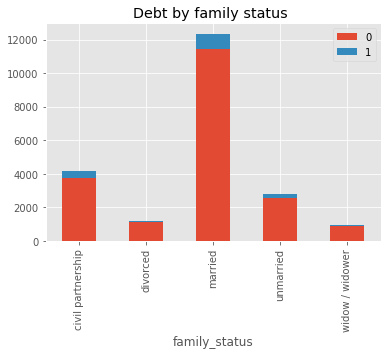

In [37]:
df.groupby(['family_status','debt']).size().unstack().plot(kind='bar',stacked=True)
plt.legend()
plt.title("Debt by family status ")
plt.show()

### Conclusion

- If we look at the family status distribution, the majority of the data corresponds to married status, being around 60% of the data, while the other half of the data is distributed among the civil partnership (~ 20%), following by unmarried (~ 10%), widow (~ 5%) and divorced (~ 5%).

- The distribution of debt among the different categories is unbalanced (non evenly distributed) and constant among categories, having a ratio around 92% of observations with debt against 8% observations without debt.

- We can infer that in general the different family status do not affect on-time repayment of the loan due that the debt has a constant distribution tendency. However, unmarried presents the higher probability of default being 10%, and widow and divorced presents the lower probability of default being 7%.

<div class="alert alert-block alert-info">
<h2> Comments </h2>
</div>

Great :)

------------

**- Is there a relation between income level and repaying a loan on time?**

In [38]:
df[['income_type','total_income']].head(5)

,income_type,total_income
0,employee,40620.102
1,employee,17932.802
2,employee,23341.752
3,employee,42820.568
4,retiree,25378.572


Text(0.5, 1.0, 'Debt by total income')

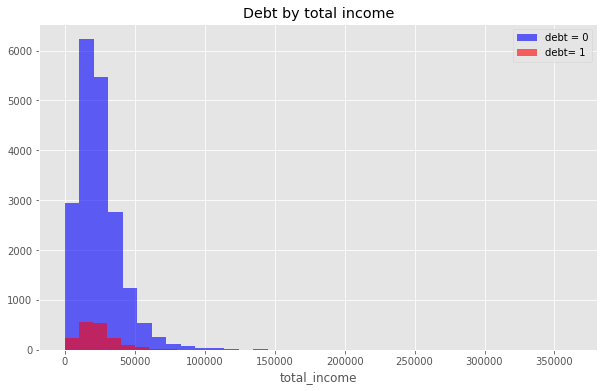

In [39]:
plt.figure(figsize=(10,6))
df[df['debt']==0]['total_income'].hist(bins=35,color='blue', alpha=0.6,
                                              label='debt = 0')
df[df['debt']==1]['total_income'].hist(bins=35,color='red', alpha=0.6,
                                              label='debt= 1')
plt.legend()
plt.xlabel("total_income")
plt.title("Debt by total income")

### Conclusion

- From the plot we can observe that the total income is skew to the right with outliers as usually is due its nature.

- We can see that the probability of default presents the same distribution and it is unbalanced as in the previous cases. 

- We can infer that in general the total income affects the on-time repayment of the loan due that the debt tends to be higher for total income is less than 50000.

<div class="alert alert-block alert-info">
<h2> Comments </h2>
</div>

Here it is also better to calculate the probability of failing on debt for each group :)

------------

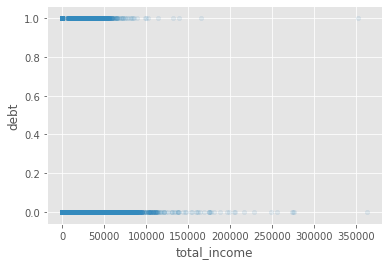

In [55]:
# Another approach
df.plot(kind='scatter',x='total_income',y='debt',alpha=0.1)

In [49]:
# correlation, metric that find the connection between two variables
df[['total_income', 'debt']].corr()

,total_income,debt
total_income,1.000000,-0.010382
debt,-0.010382,1.000000


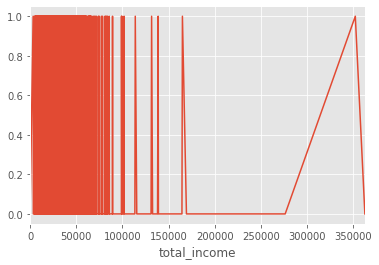

In [57]:
df.groupby(['total_income'])['debt'].median().plot()

**As we can see, there is a lot of noise, we cannot interpreted the distribution. We are going to analyze the total_income feature and categorize it into groups.**

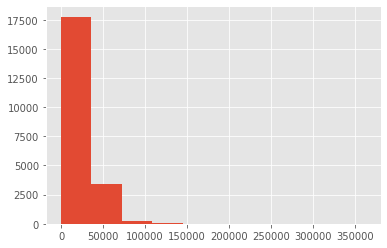

In [40]:
# Analyzing total income and categorizing it into subgroups.
df['total_income'].hist()

In [41]:
## dividing the real variable in 5 bins
print(pd.cut(df['total_income'],5).value_counts())
print('-------')

## The data is not distributed in equal parts among bins, lets distribuite the data manually in six bins
# To prevent noise and wrong rules.
print(pd.cut(df['total_income'],[0,20000,30000,40000,50000,np.inf]).value_counts())

(-362.497, 72499.329]       21130
(72499.329, 144998.658]       293
(144998.658, 217497.987]       22
(217497.987, 289997.316]        6
(289997.316, 362496.645]        2
Name: total_income, dtype: int64
-------
(0.0, 20000.0]        7369
(20000.0, 30000.0]    6063
(30000.0, 40000.0]    3106
(40000.0, 50000.0]    1492
(50000.0, inf]        1320
Name: total_income, dtype: int64


In [42]:
# creating a new feature 
df['total_income_group'] = pd.cut(df['total_income'],[0,20000,30000,40000,np.inf])
df['total_income_group'].head(2)
#df['amount_group'] = pd.cut(df['credit_amount'],[0,1000,2000,3000,5000,np.inf])

0    (40000.0, inf]
1    (0.0, 20000.0]
Name: total_income_group, dtype: category
Categories (4, interval[float64]): [(0.0, 20000.0] < (20000.0, 30000.0] < (30000.0, 40000.0] < (40000.0, inf]]

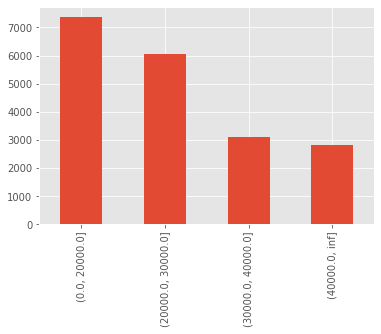

In [43]:
df['total_income_group'].value_counts().plot(kind='bar')

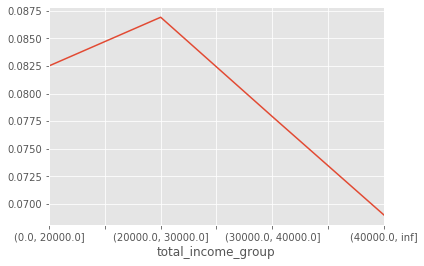

In [44]:
df.groupby(['total_income_group'])['debt'].mean().plot()

**The bigger default is found in the group with income between 20K and 30K.**

**- How do different loan purposes affect on-time repayment of the loan?**

In [45]:
## Total observations among groups
print(df.groupby(['purpose_category','debt'])['debt'].count())

purpose_category    debt
car                 0       3903
                    1        403
commercial housing  0       4127
                    1        336
education           0       3643
                    1        370
private housing     0       5901
                    1        446
wedding             0       2138
                    1        186
Name: debt, dtype: int64


In [46]:
# Percentage of obervations among groups 
round(df.groupby(['purpose_category','debt'])['debt'].count()/df.groupby(['debt' ])['purpose_category'].count(),2)

purpose_category    debt
car                 0       0.20
                    1       0.23
commercial housing  0       0.21
                    1       0.19
education           0       0.18
                    1       0.21
private housing     0       0.30
                    1       0.26
wedding             0       0.11
                    1       0.11
dtype: float64

In [47]:
# percentage of debt per category (where every category is 100%)
round(df.groupby(['purpose_category','debt'])['debt'].count()/df.groupby(['purpose_category'])['debt'].count(),2)

purpose_category    debt
car                 0       0.91
                    1       0.09
commercial housing  0       0.92
                    1       0.08
education           0       0.91
                    1       0.09
private housing     0       0.93
                    1       0.07
wedding             0       0.92
                    1       0.08
Name: debt, dtype: float64

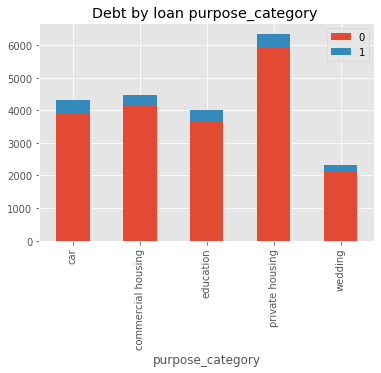

In [48]:
df.groupby(['purpose_category','debt']).size().unstack().plot(kind='bar',stacked=True)
plt.legend()
plt.title("Debt by loan purpose_category ")
plt.show()

### Conclusion

- If we look at the purpose distribution, 30% of the data corresponds to private housing while wedding only has 11% of the data. The other purposes have around 20% of data each.

- The distribution of debt among the different categories is unbalanced (non evenly distributed) and constant among categories, having a ratio around 92% observations with debt against 8% observations without debt.

- We can infer that in general the different purpose categories do not affect on-time repayment of the loan due that the debt has a constant distribution tendency. However, private housing presents the lower probability of default being 7%.

<div class="alert alert-block alert-info">
<h2> Comments </h2>
</div>

Good :)

------------

### Step 4. General conclusion

- The original dataset had 21525 observations and 12 features in the credit scoring dataset.

- Variables that were used in the relationship analysis with the debt feature were transformed if required.

- After removing duplicates and dropping/imputating missing values and transforming (adding new categories) to some features, we ended with 21453 observations and two new features:children_group, and purpose_category.

- The distribution for the debt feature is unbalanced, were most of the cases fall into not default as expected.

- The debt feature was compared against multiple variables an the probability of default percentage was almost the same for all the cases (92% of prob of default)

- As a recommendation, further analysis might need to be done if we want to use these features for modeling the probability of default or  building a credit scoring. For instance, balancing the debt feature might be required. 

<div class="alert alert-block alert-info">
<h2> Comments </h2>
</div>

Very good :)

------------

### Project Readiness Checklist

Put 'x' in the completed points. Then press Shift + Enter.

- [x]  file open;
- [ ]  file examined;
- [ ]  missing values defined;
- [ ]  missing values are filled;
- [ ]  an explanation of which missing value types were detected;
- [ ]  explanation for the possible causes of missing values;
- [ ]  an explanation of how the blanks are filled;
- [ ]  replaced the real data type with an integer;
- [ ]  an explanation of which method is used to change the data type and why;
- [ ]  duplicates deleted;
- [ ]  an explanation of which method is used to find and remove duplicates;
- [ ]  description of the possible reasons for the appearance of duplicates in the data;
- [ ]  data is categorized;
- [ ]  an explanation of the principle of data categorization;
- [ ]  an answer to the question "Is there a relation between having kids and repaying a loan on time?";
- [ ]  an answer to the question " Is there a relation between marital status and repaying a loan on time?";
- [ ]   an answer to the question " Is there a relation between income level and repaying a loan on time?";
- [ ]  an answer to the question " How do different loan purposes affect on-time repayment of the loan?"
- [ ]  conclusions are present on each stage;
- [ ]  a general conclusion is made.